### Import required packages

In [1]:
# import required packages
import numpy as np  # for numerical operations
import pandas as pd  # for data manipulation and analysis
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for enhanced data visualization
import warnings  # to suppress unnecessary warnings

# Suppress warnings to enhance code readability
warnings.filterwarnings("ignore")

### Load the Dataset

In [2]:
# reads 'car.data' as a pandas dataframe
df = pd.read_csv("../data/car.data")

# displays the top 5 rows of the dataframe
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
# rename the columns of the dataFrame for better readability
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'classes']

# displays the top 5 rows of the dataframe
df.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


### Handling Missing Values

In [4]:
# counting null values in each column of the dataframe
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
classes     0
dtype: int64

### Summary Statistics

In [5]:
# gives summary stats for each field in the dataframe
df.describe().T

,count,unique,top,freq
buying,1727,4,high,432
maint,1727,4,high,432
doors,1727,4,3,432
persons,1727,3,4,576
lug_boot,1727,3,med,576
safety,1727,3,med,576
classes,1727,4,unacc,1209


### Data Visualization

In [6]:
def categorical_viz(df: pd.DataFrame, column_name: str):
    """
    Visualize a categorical column in a DataFrame using countplot and a pie chart.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the categorical column to visualize.

    Returns:
        None
    """
    
    # create a figure with two subplots (one for countplot and one for the pie chart)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    # plot a countplot for the categorical column
    sns.countplot(data=df, x=column_name, ax=axes[0], palette="bright")
    
    # plot a pie chart to show the distribution of categories
    df[column_name].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1])
    
    # adjust the layout of the plots for better visualization
    plt.tight_layout()
    
    # display the visualizations
    plt.show()

# get the list of column names from the DataFrame
columns = df.columns

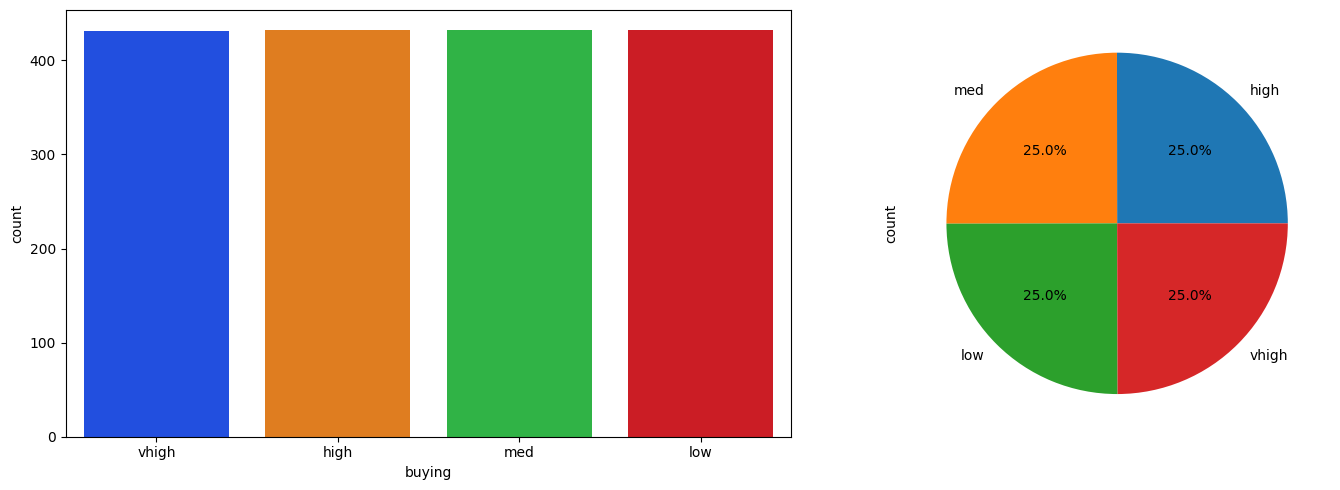

In [7]:
categorical_viz(df, columns[0])

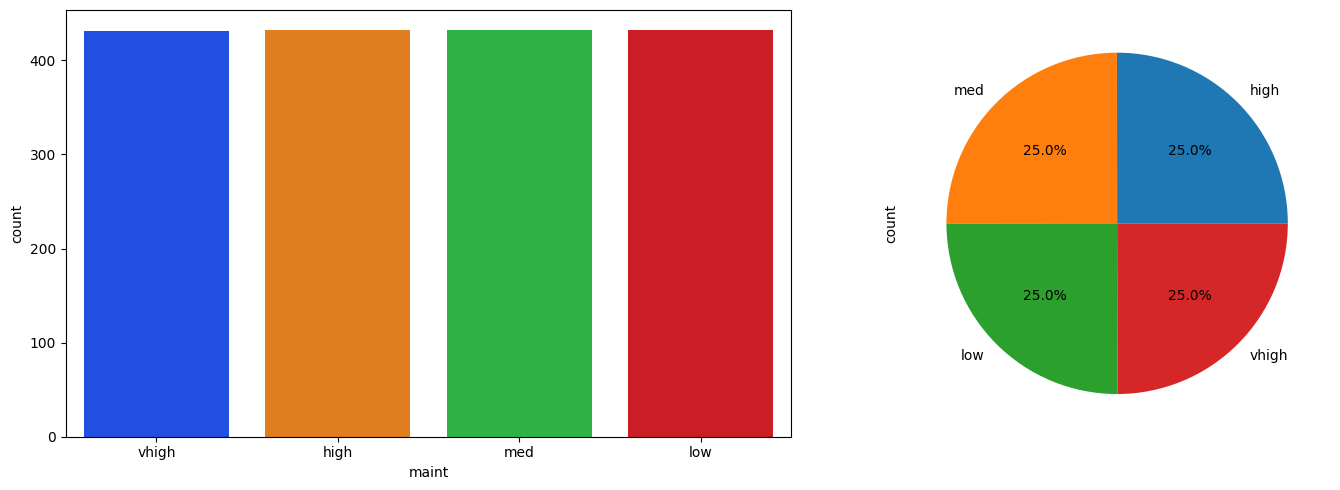

In [8]:
categorical_viz(df, columns[1])

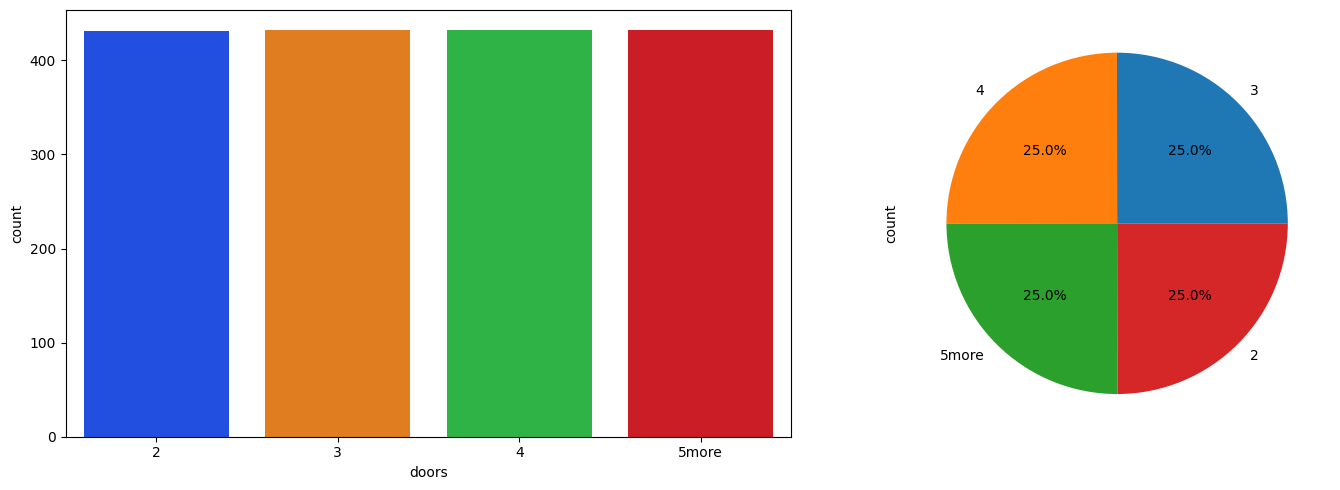

In [9]:
categorical_viz(df, columns[2])

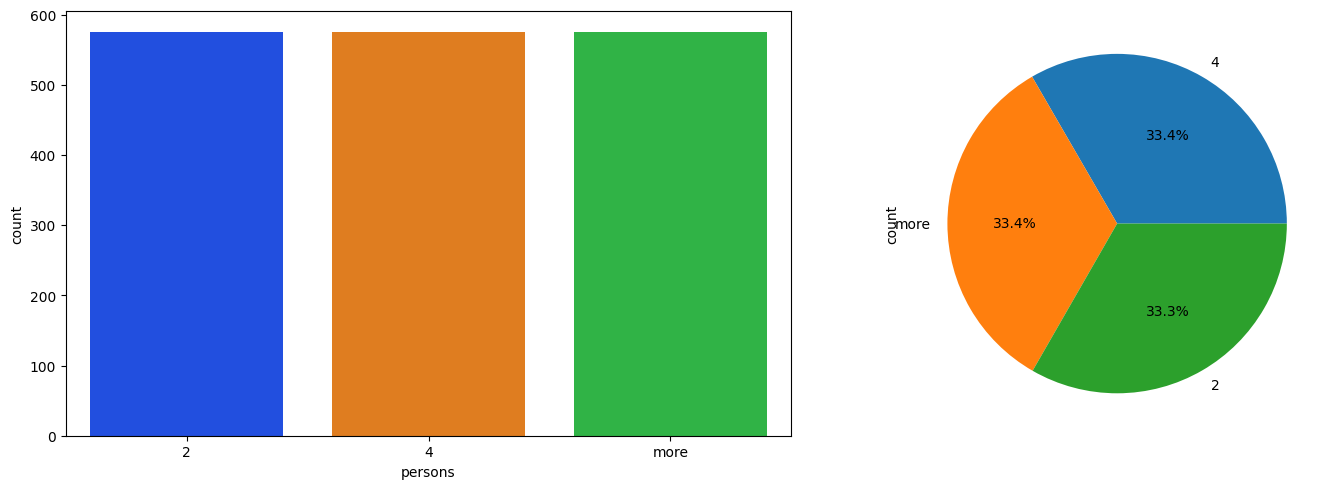

In [10]:
categorical_viz(df, columns[3])

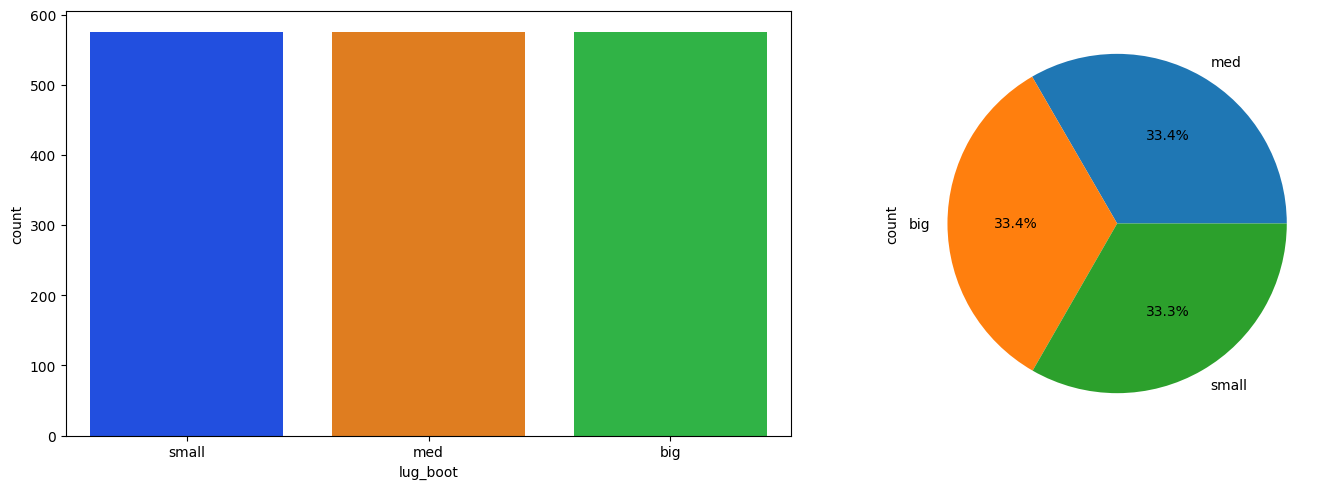

In [11]:
categorical_viz(df, columns[4])

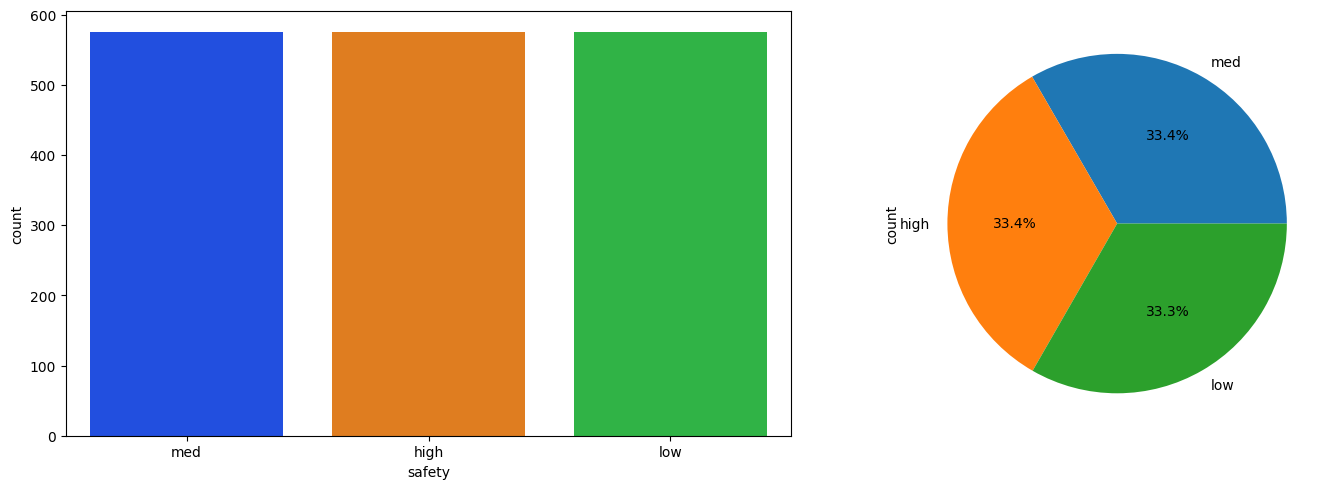

In [12]:
categorical_viz(df, columns[5])

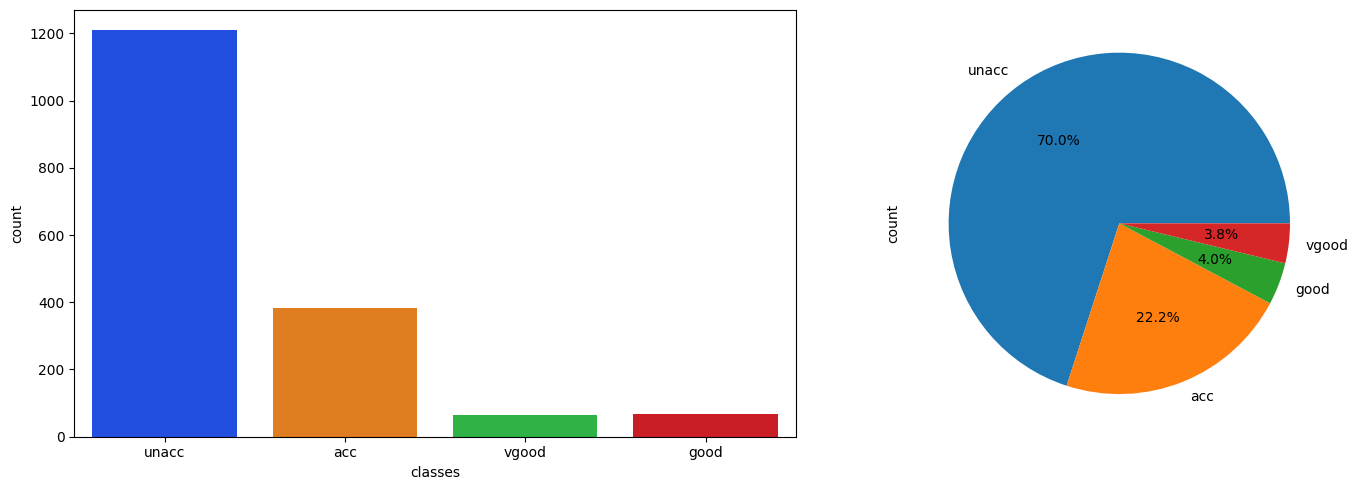

In [13]:
categorical_viz(df, columns[6])

### Data Encoding

In [14]:
# replace categorical values with numeric values
df['buying'].replace({'vhigh': 1, 'high': 2, 'med': 3, 'low': 4}, inplace=True)
df['maint'].replace({'vhigh': 1, 'high': 2, 'med': 3, 'low': 4}, inplace=True)
df['doors'].replace({'2': 1, '3': 2, '4': 3, '5more': 4}, inplace=True)
df['persons'].replace({'2': 1, '4': 2, 'more': 3}, inplace=True)
df['lug_boot'].replace({'small': 1, 'med': 2, 'big': 3}, inplace=True)
df['safety'].replace({'low': 1, 'med': 2, 'high': 3}, inplace=True)
df['classes'].replace({'unacc': 1, 'acc': 2, 'good': 3, 'vgood': 4}, inplace=True)

# displays the top 5 rows of the dataframe
df.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,1,1,1,1,1,2,1
1,1,1,1,1,1,3,1
2,1,1,1,1,2,1,1
3,1,1,1,1,2,2,1
4,1,1,1,1,2,3,1


### Data Normalization

In [15]:
# normalize each column in the DataFrame 'df' by subtracting the mean and dividing by the standard deviation.
df = df.apply(lambda x: (x - x.mean()) / x.std())

# displays the top 5 rows of the dataframe
df.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,-1.34234,-1.34234,-1.34234,-1.225277,-1.225277,-0.000709,-0.5604
1,-1.34234,-1.34234,-1.34234,-1.225277,-1.225277,1.223859,-0.5604
2,-1.34234,-1.34234,-1.34234,-1.225277,-0.000709,-1.225277,-0.5604
3,-1.34234,-1.34234,-1.34234,-1.225277,-0.000709,-0.000709,-0.5604
4,-1.34234,-1.34234,-1.34234,-1.225277,-0.000709,1.223859,-0.5604


### Model Building

In [20]:
from typing import List, Tuple
from collections import Counter

def euclidean_distance(x1: np.ndarray, x2: np.ndarray) -> float:
    """
    Calculate the Euclidean distance between two vectors.

    Parameters:
        x1 (np.ndarray): The first vector.
        x2 (np.ndarray): The second vector.

    Returns:
        float: The Euclidean distance.
    """
    return np.sqrt(np.sum((x1 - x2) ** 2))

def get_neighbors(X_train: List[np.ndarray], y_train: List[int], query: np.ndarray, k: int) -> List[int]:
    """
    Find the k-nearest neighbors for a given query.

    Parameters:
        X_train (List[np.ndarray]): List of training data points.
        y_train (List[int]): List of labels corresponding to the training data.
        query (np.ndarray): The query data point for which neighbors are to be found.
        k (int): The number of neighbors to retrieve.

    Returns:
        List[int]: List of labels for the k-nearest neighbors.
    """
    distances = [euclidean_distance(query, x) for x in X_train]
    neighbors_indices = np.argsort(distances)[:k]
    neighbors = [y_train[i] for i in neighbors_indices]
    return neighbors

def predict_classification(neighbors: List[int]) -> int:
    """
    Predict the class based on majority voting among neighbors.

    Parameters:
        neighbors (List[int]): List of labels for the k-nearest neighbors.

    Returns:
        int: The predicted class.
    """
    vote_counts = Counter(neighbors)
    most_common = vote_counts.most_common(1)
    return most_common[0][0]

def evaluate_classification(y_true: List[int], y_pred: List[int]) -> float:
    """
    Evaluate the classification accuracy.

    Parameters:
        y_true (List[int]): List of true class labels.
        y_pred (List[int]): List of predicted class labels.

    Returns:
        float: Classification accuracy.
    """
    correct = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
    accuracy = correct / len(y_true)
    return accuracy

def elbow_method(X_train: List[np.ndarray], y_train: List[int], X_test: List[np.ndarray], y_test: List[int], k_max: int) -> Tuple[List[float], List[float]]:
    """
    Perform the elbow method to find the optimal K value for KNN classification.

    Parameters:
        X_train (List[np.ndarray]): List of training data points.
        y_train (List[int]): List of labels corresponding to the training data.
        X_test (List[np.ndarray]): List of test data points.
        y_test (List[int]): List of true class labels for the test data.
        k_max (int): Maximum value of K to test.

    Returns:
        List[float]: List of accuracies for different K values.
    """
    k_values = list(range(1, k_max + 1))
    accuracies = []
    for k in k_values:
        y_pred = [predict_classification(get_neighbors(X_train, y_train, query, k)) for query in X_test]
        accuracy = evaluate_classification(y_test, y_pred)
        accuracies.append(accuracy)
    return k_values, accuracies

### Find Optimal Value of K

In [21]:
from sklearn.model_selection import train_test_split

# convert your DataFrame 'df' to a numpy array 'dataset'
dataset = df.values

# split the dataset into features (X) and labels (y)
X = dataset[:, 0:6]  # features (all columns except the last one)
y = np.asarray(dataset[:, 6])  # labels (the last column)

# perform the train-test split, using 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# choose the optimal k based on the elbow method results
k_max = 10
k_values, accuracies = elbow_method(X_train, y_train, X_test, y_test, k_max)
optimal_k = k_values[np.argmax(accuracies)]
print(f"Optimal k: {optimal_k}")

Optimal k: 7


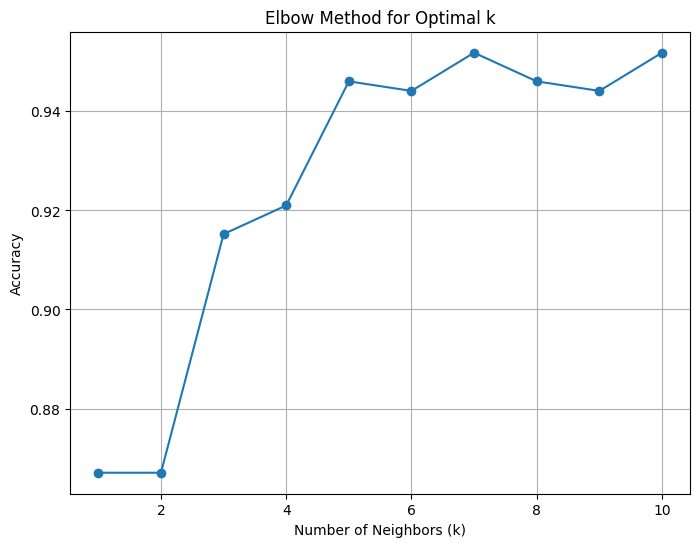

In [23]:
# plot the accuracy values for different values of k
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

### Model Evaluation

In [24]:
# make predictions on the test data using the best 'k' value
y_pred_test = []
for query in X_test:
    neighbors = get_neighbors(X_train, y_train, query, optimal_k)
    prediction = predict_classification(neighbors)
    y_pred_test.append(prediction)

# evaluate the accuracy of the model with the best 'k' value
accuracy_test = evaluate_classification(y_test, y_pred_test)
print(f"Accuracy on test data with k={optimal_k} : {accuracy_test}")

Accuracy on test data with k=7 : 0.9518304431599229
